# Credit Card Fraud Detection

## Importing packages

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette("rocket")
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import matplotlib as mpl

## Loading the data

In [18]:
df = pd.read_csv('creditcard.csv')
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [19]:
display(df.info())
print('\n')
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- None of the features have missing values so we do not have to impute the data.
- The data has already been scaled and transformed through PCA apart from the time and amount columns, which means we will have to take care of this later in the pre-processing step.

Non-fraud is  99.83 % of the dataset
Fraud is  0.17 % of the dataset


0    284315
1       492
Name: Class, dtype: int64

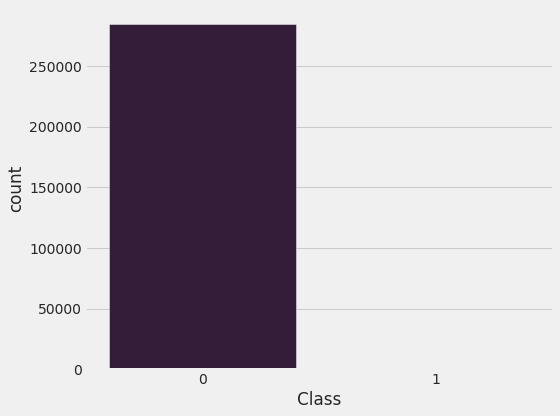

In [20]:
print('Non-fraud is ', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Fraud is ', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')
display(df['Class'].value_counts())
_ = sns.countplot(x = 'Class', data = df, palette = color)
plt.gcf().set_size_inches(8,6)
plt.tight_layout()

- The data is highly imbalanced as fraud cases only make up 0.17% of the dataset. 
- Creating a model with such unbalanced data will result in highly biased predictions as the model will just predict most cases to be non-fraud, which can cause it to fail to detect real fraud cases.
- Before creating the model it is important to balance the data to ensure that the model is able to detect patterns that give signs of fraud.

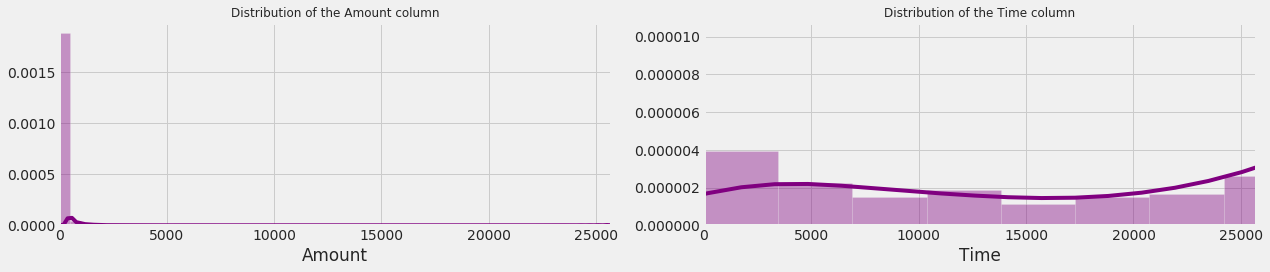

In [21]:
fig, ax = plt.subplots(1,2, figsize = (18, 4))
amount = df.Amount.values
time = df.Amount.values

_ = sns.distplot(df['Amount'], color = 'purple', ax = ax[0])
ax[0].set_title('Distribution of the Amount column', fontsize = 12)
ax[0].set_xlim([min(amount), max(amount)])

_ = sns.distplot(df['Time'], color = 'purple', ax = ax[1])
ax[1].set_title('Distribution of the Time column', fontsize = 12)
ax[1].set_xlim([min(time), max(time)])

plt.tight_layout()

- From the distribution of the Amount column it seems that most of the transaction amounts are below $1000. 
- The describe table shows that 75% of the transactions are below $80. 
- Let's explore the amount column further. 

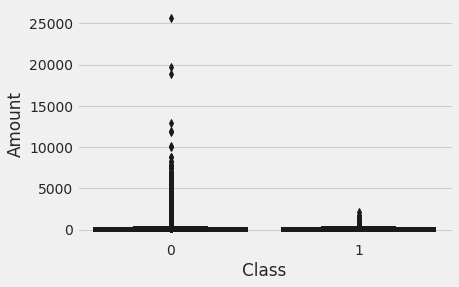

In [22]:
_ = sns.boxplot(x = 'Class', y = 'Amount', data = df, palette = color)

- Most outliers in the amount column are non-fraud cases. 
- Outliers can negatively affect analysis of data and the training process causing the model to have low accuracy levels.
- We will deal with the ourliers later to improve model accuracy.

## Preprocessing the Data

- As mentioned the amount column was not transformed so before balancing the data lets scale them to put all features in the same range to give a justified importance to each feature.
- The time column is not important is determining fraud in this case so we will drop it.

### Scaling the Amount column

In [23]:
# dropping the time column
df.drop('Time', axis = 1, inplace = True)

# scaling the amount column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


- Before resampling the data we need to split the dataset to X and y variables.
- This is because the only data that needs to be balanced is the training data. We will test on the original test data.

### Splitting and Resampling the Dataset 

In [24]:
# splitting the dataset
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

- Before balancing the data lets see how the model would perform without balancing the data.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



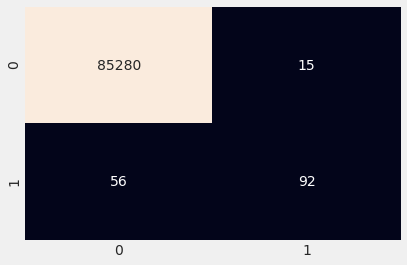

In [25]:
def model_evaluation(model = LogisticRegression()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', cmap = 'rocket', cbar = False)
    return cf_matrix

model_evaluation()

- The model is unable to accuractely classify the two classes because it is unable to handle the minority class. It has an accuracy of 100% because it simply classified most data points in class 0. Only 62% of the class 1 data points were correctly classified while almost all of class 0 points were correctly classified. This is why it is important for us  to balance our data before we create our model.
- The problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.
- There are several ways of balancing data with the most common being simple over and undersampling. Other methods include SMOTE, NearMiss and SMOTE Tomet. We will balance the data with all methods and compare performance.

### Balancing the Data

#### Undersampling Method

- The undersampling technique involves keeping all the data in the minority class and decreasing the size of the majority class. 
- While it works well in balancing data it leads to loss of important information as data is dropped from the majority class.

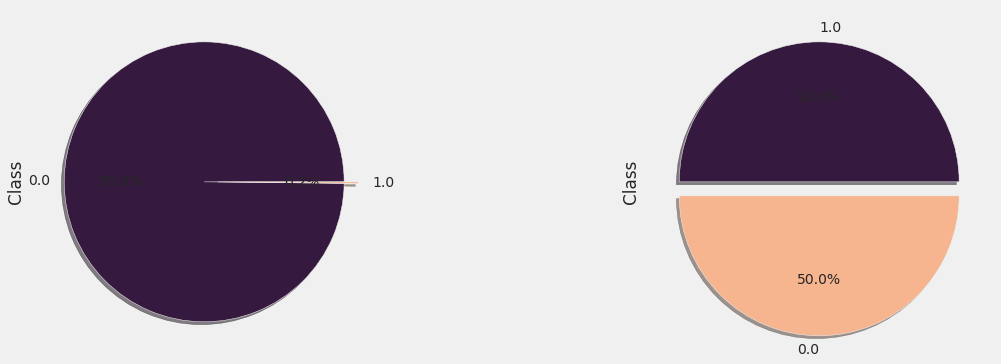

In [26]:
# resampling the data
df_train = pd.concat([X_test, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# undersampling
shuffled_df = df_train.sample(frac = 1, random_state=42)
fraud_df_us = shuffled_df[shuffled_df['Class'] == 1]
nonfraud_df_us = shuffled_df[shuffled_df['Class'] == 0].sample(n = len(fraud_df_us), 
                random_state = 42)
undersampled_df = pd.concat([fraud_df_us, nonfraud_df_us])
 
# plotting new undersampled dataset
fig, ax = plt.subplots(1,2, figsize = (18, 6))
explode = [0, 0.1]
_ = df_train['Class'].value_counts().plot(kind = 'pie', autopct ='%.1f%%', 
shadow = True, explode = explode, cmap = mpl.colors.ListedColormap(sns.color_palette("rocket")), ax = ax[0])
_ = undersampled_df['Class'].value_counts().plot(kind = 'pie', autopct ='%.1f%%', 
shadow = True, explode = explode, cmap = mpl.colors.ListedColormap(sns.color_palette("rocket")), ax = ax[1])

#### Oversampling

- Oversampling involves supplementing the minority class with copies of its data points to balance the dataset. Random sampling is employed more frequently than undersampling as it is convenient in that it does not lead to the loss of data.

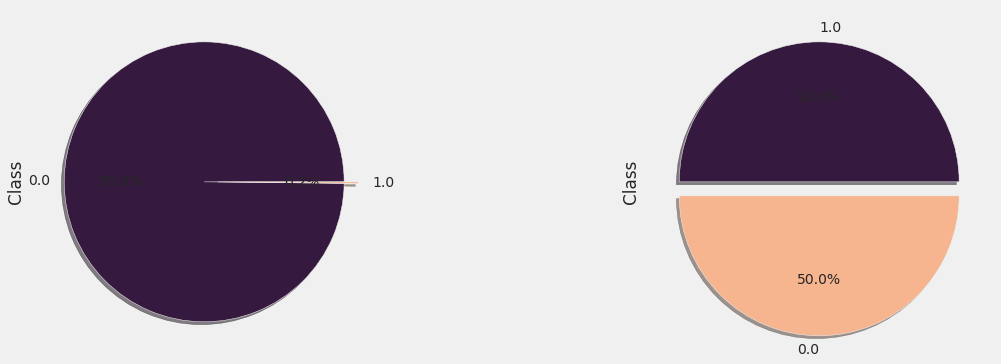

In [27]:
# Oversampling
shuffled_df = df_train.sample(frac = 1, random_state=42)
nonfraud_df_os = shuffled_df[shuffled_df['Class'] == 0]
fraud_df_os = shuffled_df[shuffled_df['Class'] == 1].sample(n = len(nonfraud_df_os), random_state = 42, replace = True)
oversampled_df = pd.concat([fraud_df_os, nonfraud_df_os])

# Plotting the oversampled dataset
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
explode = [0, 0.1]
_ = df_train['Class'].value_counts().plot(kind = 'pie', autopct ='%.1f%%', 
shadow = True, explode = explode, cmap = mpl.colors.ListedColormap(sns.color_palette("rocket")), ax = ax[0])
_ = oversampled_df['Class'].value_counts().plot(kind = 'pie', autopct ='%.1f%%', shadow = True, 
    explode = explode, cmap = mpl.colors.ListedColormap(sns.color_palette("rocket")), ax = ax[1])

### Checking the performance of resampled data

- Now that we have resampled the data using the simple undersampling and oversampling techniques, we will now compare the performance of the models trained using the resulting dfs to find out which balancing technique works best.

fsrat